<a href="https://colab.research.google.com/github/JagritiPrakash/An-Understanding-of-Covid-19-in-India/blob/master/Deceased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Selection,Exploratory Data Analysis, for predicting the value of number of deceased using Machine Learning Techniques

Importing Libraries from python

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)


Importing Machine Learning Algorithms from Skicit learn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn import svm




From importing the csv file

In [0]:
from google.colab import files

In [0]:
upload_files = files.upload()

Saving case_time_series.csv to case_time_series (1).csv


In [0]:
!ls


'case_time_series (1).csv'   case_time_series.csv   sample_data


csv file from https://api.covid19india.org/csv/

In [0]:
df = pd.read_csv("case_time_series.csv")
df.head()

,Date,Daily_Confirmed,Total_Confirmed,Daily_Recovered,Total_Recovered,Daily_Deceased,Total_Deceased
0,30-Jan,1,1,0,0,0,0
1,31-Jan,0,1,0,0,0,0
2,01-Feb,0,1,0,0,0,0
3,02-Feb,1,2,0,0,0,0
4,03-Feb,1,3,0,0,0,0


Rows and Columns in the dataset

In [0]:
df.shape

(113, 7)

Checking for null values in the features

In [0]:
df.isnull().sum()

Date               0
Daily_Confirmed    0
Total_Confirmed    0
Daily_Recovered    0
Total_Recovered    0
Daily_Deceased     0
Total_Deceased     0
dtype: int64

In [0]:
df['Daily_Confirmed'].value_counts()

0       29
1        5
10       3
2        2
560      1
        ..
74       1
1667     1
78       1
4794     1
1801     1
Name: Daily_Confirmed, Length: 78, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             113 non-null    object
 1   Daily_Confirmed  113 non-null    int64 
 2   Total_Confirmed  113 non-null    int64 
 3   Daily_Recovered  113 non-null    int64 
 4   Total_Recovered  113 non-null    int64 
 5   Daily_Deceased   113 non-null    int64 
 6   Total_Deceased   113 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 6.3+ KB


Visualization

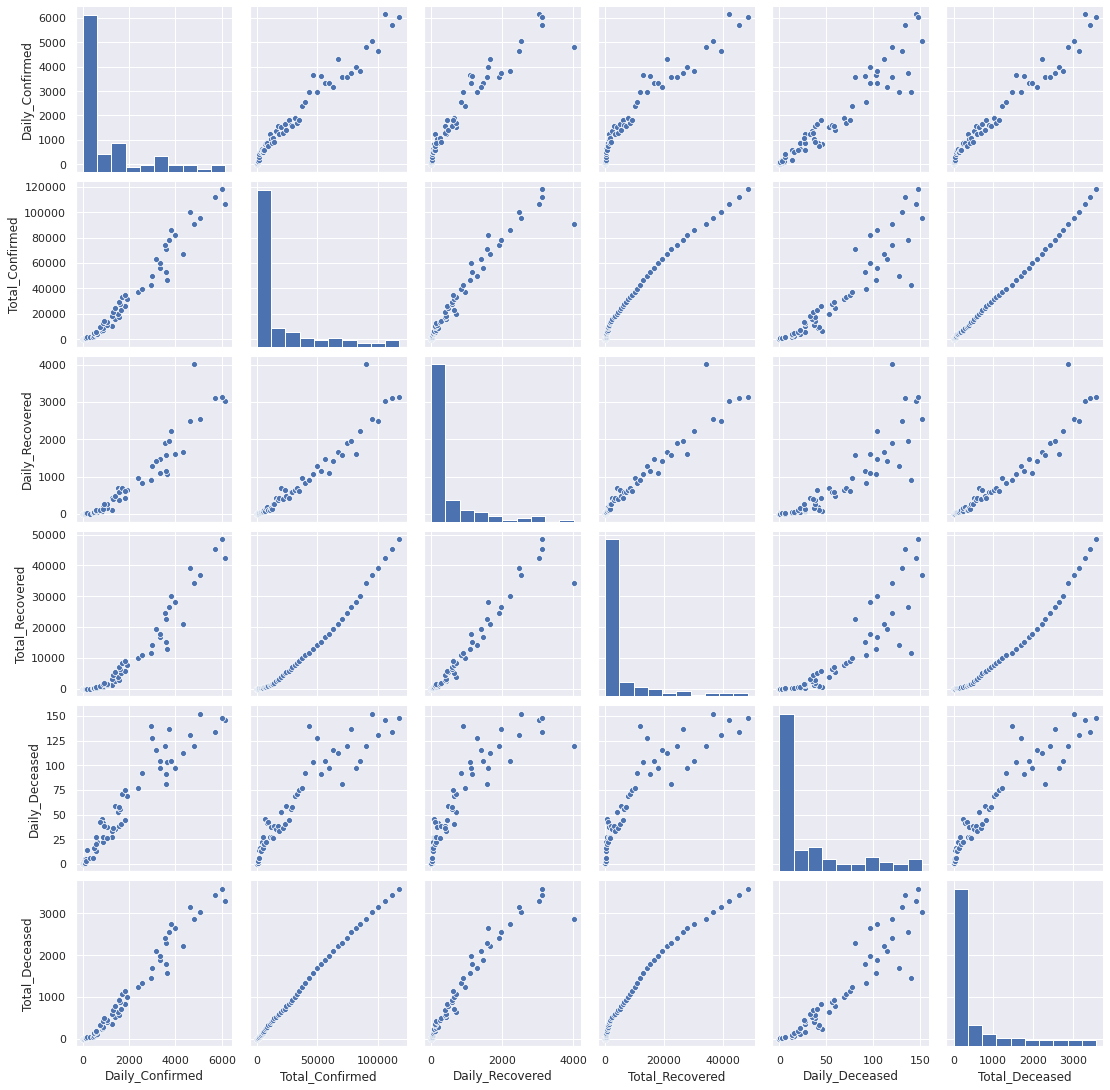

In [0]:
sns.pairplot(df)

In [0]:
df.describe()

,Daily_Confirmed,Total_Confirmed,Daily_Recovered,Total_Recovered,Daily_Deceased,Total_Deceased
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1046.238938,17607.061947,429.672566,5445.371681,31.707965,566.513274
std,1563.284999,29603.319661,808.042072,10887.608575,45.127930,943.349211
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000
50%,94.000000,730.000000,10.000000,50.000000,3.000000,16.000000
75%,1568.000000,23040.000000,484.000000,5012.000000,46.000000,722.000000
max,6154.000000,118225.000000,4012.000000,48553.000000,152.000000,3583.000000


Calcuting total number of active cases

In [0]:
df['Total_Active_Cases']= df['Total_Confirmed']-(df['Total_Recovered']+df['Total_Deceased'])

In [0]:
df

,Date,Daily_Confirmed,Total_Confirmed,Daily_Recovered,Total_Recovered,Daily_Deceased,Total_Deceased,Total_Active_Cases
0,30-Jan,1,1,0,0,0,0,1
1,31-Jan,0,1,0,0,0,0,1
2,01-Feb,0,1,0,0,0,0,1
3,02-Feb,1,2,0,0,0,0,2
4,03-Feb,1,3,0,0,0,0,3
...,...,...,...,...,...,...,...,...
108,17-May,5049,95698,2538,36795,152,3024,55879
109,18-May,4628,100326,2482,39277,131,3155,57894
110,19-May,6154,106480,3032,42309,146,3301,60870
111,20-May,5716,112196,3113,45422,134,3435,63339


In [0]:
Splitting the dataset into Training and Testing Data

In [0]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=0)

In [0]:
train.shape

(90, 8)

In [0]:
test.shape

(23, 8)

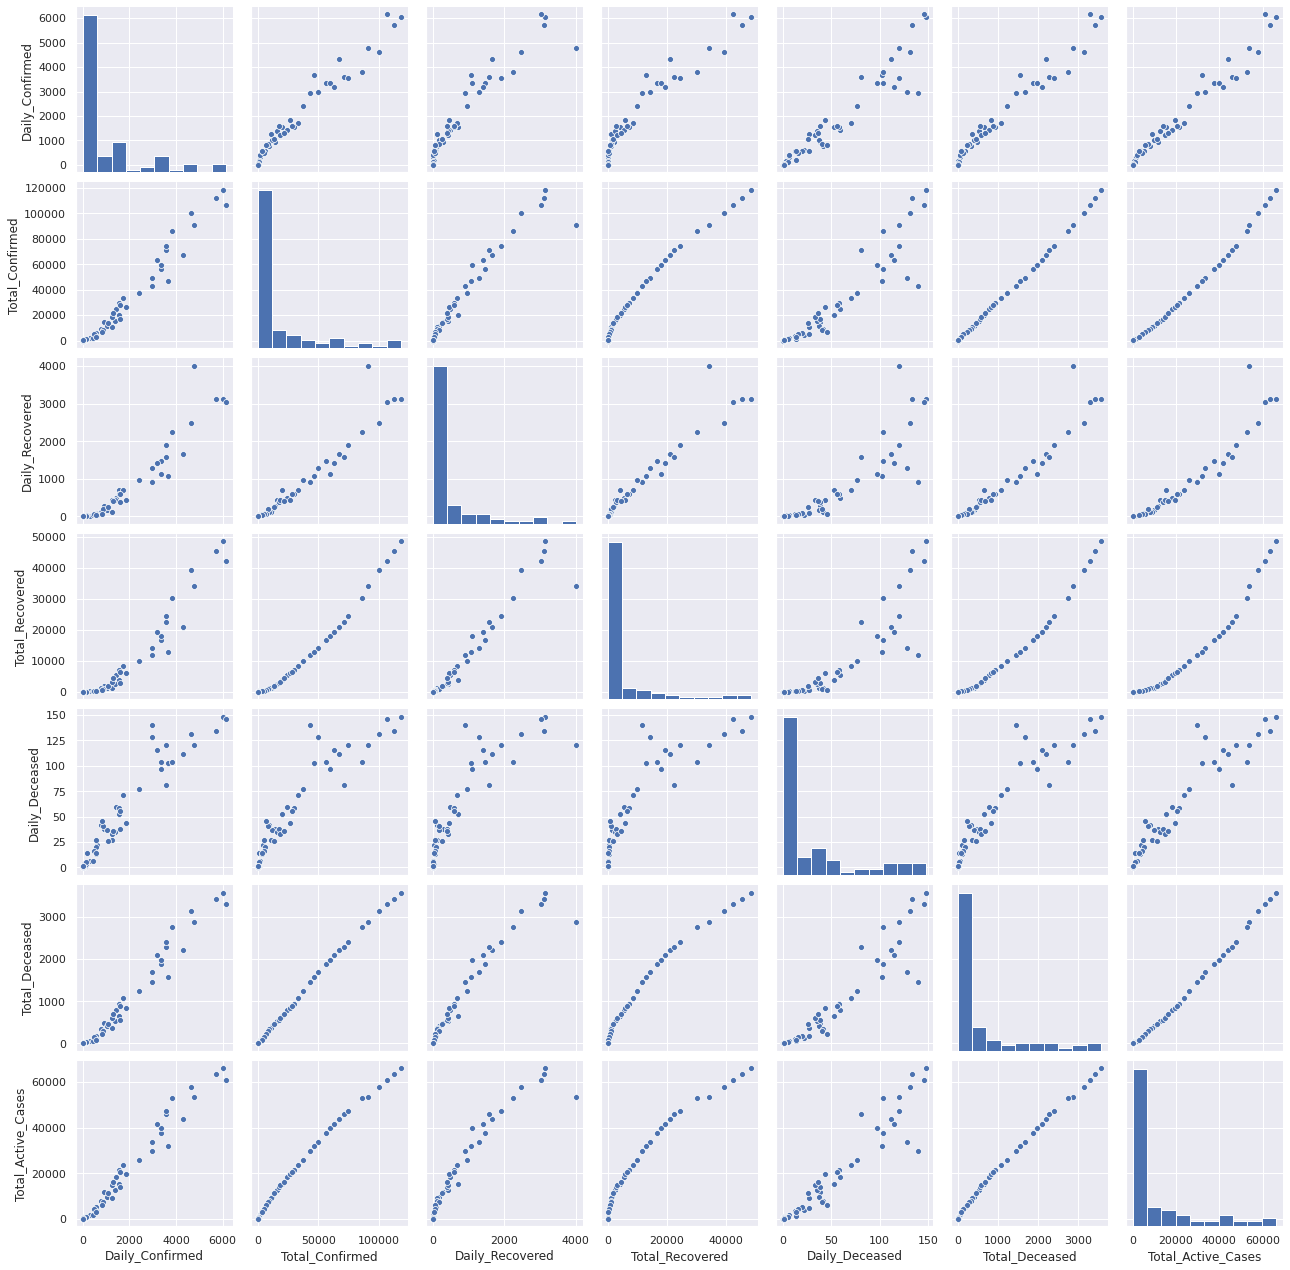

In [0]:
sns.pairplot(train)

In [0]:
cols=list(train.columns.values)
cols

['Date',
 'Daily_Confirmed',
 'Daily_Recovered',
 'Daily_Deceased',
 'Total_Confirmed',
 'Total_Recovered',
 'Total_Active_Cases',
 'Total_Deceased']

In [0]:
train = train[['Date','Daily_Confirmed','Daily_Recovered','Daily_Deceased','Total_Confirmed','Total_Recovered','Total_Active_Cases','Total_Deceased']]
test = test[['Date','Daily_Confirmed','Daily_Recovered','Daily_Deceased','Total_Confirmed','Total_Recovered','Total_Active_Cases','Total_Deceased']]

In [0]:
train_copy=train.copy()
test_copy=test.copy()

In [0]:
train_copy.head()


,Date,Daily_Confirmed,Daily_Recovered,Daily_Deceased,Total_Confirmed,Total_Recovered,Total_Active_Cases,Total_Deceased
43,13-Mar,10,6,0,91,10,80,1
8,07-Feb,0,0,0,3,0,3,0
78,17 April,922,273,38,14354,2040,11827,487
82,21 April,1537,703,53,20081,3976,15459,646
60,30-Mar,187,35,14,1326,137,1148,41


Taking the indepedent variable as "The total number of confirmed cases" and dependent (target value) as " The total number of deceased"

In [0]:
X = train_copy['Total_Confirmed'].values.reshape(-1,1)
y = train_copy['Total_Deceased'].values

Applying Linear Regression Algorithm to our training data

In [0]:
model = LinearRegression()

In [0]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
model.coef_

array([0.03171325])

In [0]:
model.intercept_

6.469393651887913

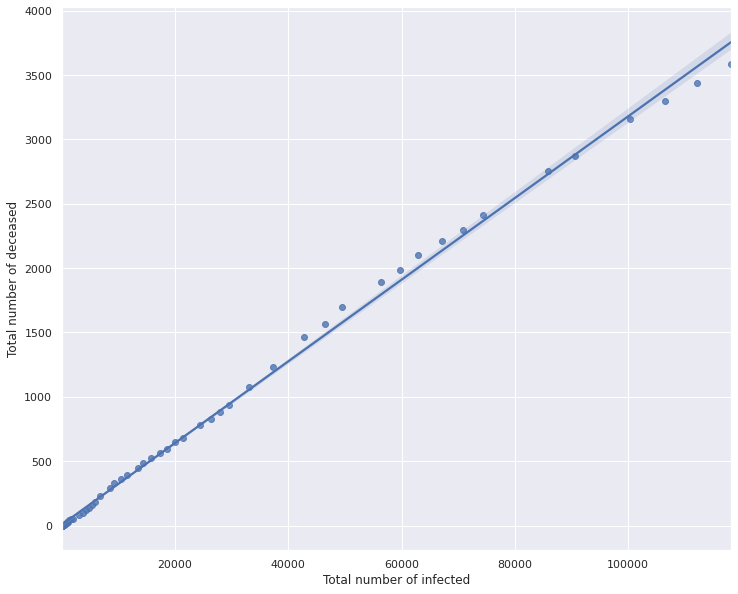

In [0]:
plt.figure(figsize=(12,10));
sns.regplot(X,y)
plt.xlabel('Total number of infected')
plt.ylabel('Total number of deceased')
plt.show();

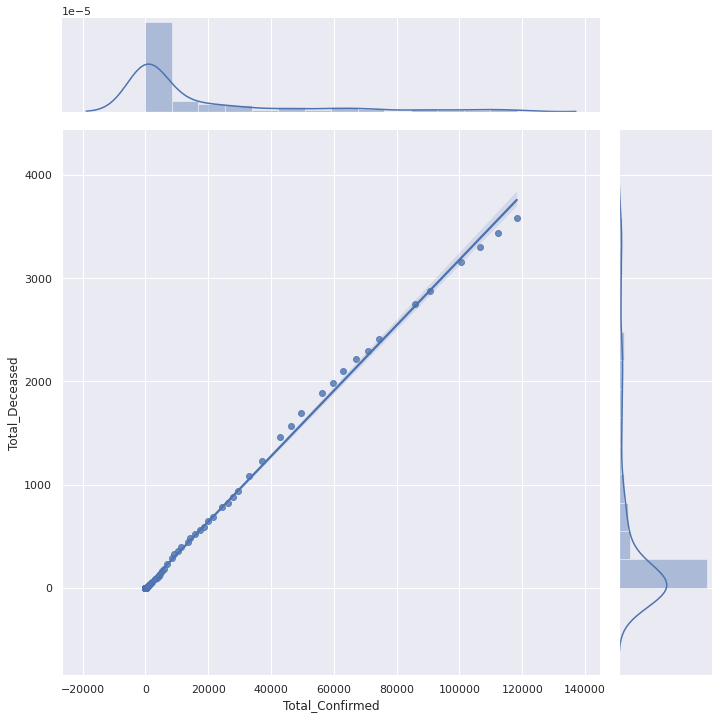

In [0]:
sns.jointplot(x='Total_Confirmed',y='Total_Deceased', data = train_copy, kind = 'reg', height=10 );
plt.show();

Predicting the target value for the given independent value i.e. total_confirmed

In [0]:
model.predict(np.array([30000]).reshape(1,-1))

array([957.86680431])

Another Linear Regression Model where independent parameter is total number of active cases

In [0]:
X = df['Total_Active_Cases'].values.reshape(-1,1)
y = df['Total_Deceased'].values
model.fit(X,y)
plt.figure(figsize=(12,10));
sns.regplot(X,y);
plt.xlabel('Number of Active Cases')
plt.ylabel('Total number of deceased')
plt.show();

Finding the correlation coefficient

In [0]:
train_copy.corr()

,Daily_Confirmed,Daily_Recovered,Daily_Deceased,Total_Confirmed,Total_Recovered,Total_Active_Cases,Total_Deceased
Daily_Confirmed,1.000000,0.952986,0.965540,0.984810,0.955190,0.989070,0.986471
Daily_Recovered,0.952986,1.000000,0.895148,0.971859,0.973936,0.957081,0.968405
Daily_Deceased,0.965540,0.895148,1.000000,0.942970,0.889498,0.962117,0.951628
Total_Confirmed,0.984810,0.971859,0.942970,1.000000,0.985663,0.994783,0.999123
Total_Recovered,0.955190,0.973936,0.889498,0.985663,1.000000,0.963310,0.979215
Total_Active_Cases,0.989070,0.957081,0.962117,0.994783,0.963310,1.000000,0.997252
Total_Deceased,0.986471,0.968405,0.951628,0.999123,0.979215,0.997252,1.000000
